In [2]:
from PIL import Image

In [240]:
img =Image.open("dragon-4.png")

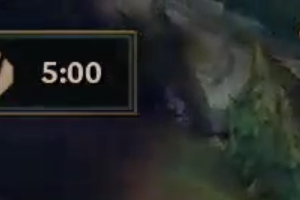

In [226]:
replay=img.crop((100,100,400,300))
replay

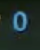

In [227]:
t_b=img.crop((1000,110,1040,160))
t_b

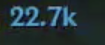

In [228]:
g_b=img.crop((1135,115,1240,160))
g_b

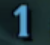

In [144]:
k_b=img.crop((1380,120,1430,165))
k_b

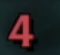

In [145]:
k_r=img.crop((1480,110,1540,165))
k_r

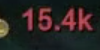

In [200]:
g_r=img.crop((1700,110,1800,160))
g_r

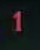

In [241]:
t_r=img.crop((1890,110,1930,160))
t_r

In [150]:
status=img.crop((1090,420,1800,480))

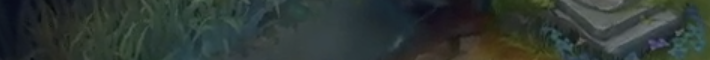

In [151]:
status

In [249]:
import io
import os
from google.cloud import vision
from google.cloud.vision import types
os.environ['GOOGLE_APPLICATION_CREDENTIALS']="/home/ubuntu/2020_1/cap/google_hyein.json"

def image_to_byte_array(image:Image):
    imgbyteArr=io.BytesIO()
    image.save(imgbyteArr,format='PNG')
    imgbyteArr=imgbyteArr.getvalue()
    return imgbyteArr
def crop_image(img):
    t_b=img.crop((1000,110,1040,160))
    t_b=image_to_byte_array(t_b)
    
    g_b=img.crop((1135,115,1240,160))
    g_b=image_to_byte_array(g_b)
    
    k_b=img.crop((1380,120,1430,165))
    k_b=image_to_byte_array(k_b)
    
    k_r=img.crop((1480,110,1540,165))
    k_r=image_to_byte_array(k_r)
    
    g_r=img.crop((1700,110,1800,160))
    g_r=image_to_byte_array(g_r)
    
    t_r=img.crop((1890,110,1930,160))
    t_r=image_to_byte_array(t_r)
    
    status=img.crop((1090,420,1800,480))
    status=image_to_byte_array(status)
    
    replay=img.crop((100,100,400,300))
    replay=image_to_byte_array(replay)
    return t_b, g_b,k_b,k_r,g_r,t_r,status,replay

def vision_api(file_name):
    client=vision.ImageAnnotatorClient()
    img =Image.open(file_name)
    
    t_b, g_b,k_b,k_r,g_r,t_r,status,replay=crop_image(img)
    dash_list=[t_b, g_b,k_b,k_r,g_r,t_r,status,replay]
    name_list=["tower_blue","gold_blue","kill_blue","kill_red","gold_red","tower_red","status","replay"]
    text_list={}
    for idx,imgbyteArr in enumerate(dash_list):
        image=types.Image(content=imgbyteArr)
        response=client.document_text_detection(image=image)
        texts=response.text_annotations
        try:
            text_list[name_list[idx]]=(texts[0].description.strip()).lower()
        except:
            text_list[name_list[idx]]=''
        """
        for i,text in enumerate(texts):
            print('\n" : {}"'.format(text.description))
            if i==0:
                text_list[name_list[idx]]=text.description[:-1]
        """
        

        if response.error.message:
            raise Exception(
                '{}\nFor more info on error messages, check: '
                'https://cloud.google.com/apis/design/errors'.format(
                    response.error.message))
        
    print(text_list)
    return score_cal(text_list)
        
def score_cal(text_list):
    name_list=["tower_blue","gold_blue","kill_blue","kill_red","gold_red","tower_red","status","replay"]
    score_list={}
    if "REPLAY" in text_list['replay']:
        score_list['replay']=True
    else:
        score_list['replay']=False
        ######t_b
        try:
            t_b=text_list['tower_blue'].replace('о','0')
            score_list['tower_blue']=int(t_b)
        except:
            print("can not recognize tower_blue")
            score_list['tower_blue']=0

        ######g_b
        try:
            g_b=text_list['gold_blue'].replace(',','.')
            score_list['gold_blue']=float(g_b[:-1])#k 제거
        except:
            print("can not recognize gold_blue")
            score_list['gold_blue']=0
        
        ######k_b
        try:
            k_b=text_list['kill_blue'].replace('о','0')        
            score_list['kill_blue']=int(k_b)
        except:
            print("can not recognize kill_blue")
            score_list['kill_blue']=0

        
        ######k_r
        try:
            k_r=text_list['kill_red'].replace('о','0')        
            score_list['kill_red']=int(k_r) 
        except:
            print("can not recognize kill_red")
            score_list['kill_red']=0
        
        ######g_r
        try:
            g_r=text_list['gold_red'].replace(',','.')
            score_list['gold_red']=float(g_r[:-1])#k 제거
        except:
            print("can not recognize gold_red")
            score_list['gold_red']=0
        
        ######tower_red
        try:
            t_r=text_list['tower_red'].replace('о','0')
            score_list['tower_red']=int(t_r)    
        except:
            print("can not recognize tower_red")
            score_list['tower_red']=0
        
        ######status
        status=[]
        if "dragon" in status:
            status=[1,0]
            score_list['status']=status
        elif "baron" in status:
            status=[0,1]
            score_list['status']=status
        else:
            status=[0,0]
            score_list['status']=status   
    return score_list
vision_api('dragon-4.png')

{'tower_blue': 'о', 'gold_blue': '22.7k', 'kill_blue': '2', 'kill_red': '6', 'gold_red': '26.4k', 'tower_red': '', 'status': 'red team has slain the dragon!', 'replay': '5:00'}
can not recognize tower_red
{'replay': False, 'tower_blue': 0, 'gold_blue': 22.7, 'kill_blue': 2, 'kill_red': 6, 'gold_red': 26.4, 'tower_red': 0, 'status': [0, 0]}


{'replay': False,
 'tower_blue': 0,
 'gold_blue': 22.7,
 'kill_blue': 2,
 'kill_red': 6,
 'gold_red': 26.4,
 'tower_red': 0,
 'status': [0, 0]}

In [41]:
imgbyteArr

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1a\x00\x00\x00\x19\x08\x06\x00\x00\x00/\xde>`\x00\x00\x0cEiCCPICC Profile\x00\x00x\x9c\x95W\x07TS\xc9\x1a\x9e[RIh\x81\x08H\t\xbd\x89"\xbdH\t\xa1E\x10\x90*\xd8\x08I \xa1\xc4\x98\x10D\xec\xca\xa2\x82k\x17\x11\xb0\xa1\xab"\x8a\xae\x05\x90\xb5b/\x8bb\xef\x0f\x0b*\xca\xbaX\xb0\xa1\xf2&\x05t\xf5\xbc\xf7\xce\xfb\xcf\x99;_\xfe\xf9\xe7\xfbK\xe6\xce\x9d\x01@\xa7\x9a\'\x95\xe6\xa2\xba\x00\xe4I\xf2e\xf1\x11!\xac1\xa9i,\xd2c\x80\x02\x1cP\x81\x0e@y|\xb9\x94\x1d\x17\x17\r\xa0\xf4\xf7\xff\x94w\xd7\x01\xa2\xec\xaf\xb8(\xb9~\x1e\xff\xaf\xa2\'\x10\xca\xf9\x00 q\x10g\x08\xe4\xfc<\x88\xf7\x01\x80\x17\xf3\xa5\xb2|\x00\x88>Po=%_\xaa\xc4\xe3 6\x90\xc1\x00!\x96*q\x96\x1a\x17+q\x86\x1aW\xa8l\x12\xe39\x10\xef\x00\x80L\xe3\xf1dY\x00h7A=\xab\x80\x9f\x05y\xb4oB\xec*\x11\x88%\x00\xe8\x90!\x0e\xe4\x8bx\x02\x88#!\x1e\x92\x977I\x89\xa1\x1dp\xc8\xf8\x8e\'\xeb\x1f\x9c\x19\x03\x9c<^\xd6\x00V\xe7\xa2\x12r\xa8X.\xcd\xe5M\xfd?\xcb\xf1\xbf%/W\xd1\xef\xc3\x0e6\x9aH\x16\x19\xaf

In [82]:
img =Image.open("dragon-4.png")
img2=img.crop((1000,110,1030,160))
img2

In [245]:
img=image_to_byte_array(t_r.convert("L"))


In [246]:
client=vision.ImageAnnotatorClient()
image=types.Image(content=img)
response=client.document_text_detection(image=image)
texts=response.text_annotations
print(texts[0].description.strip())

if response.error.message:
    raise Exception(
        '{}\nFor more info on error messages, check: '
        'https://cloud.google.com/apis/design/errors'.format(
            response.error.message))

IndexError: list index (0) out of range